In [1]:
import pandas as pd
import numpy as np
import sklearn
import pickle
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MaxAbsScaler
from sklearn import model_selection
from sklearn import linear_model
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import KFold
from numpy import save

In [2]:
data = pd.read_csv('cleaned_bank_campaign.csv')

In [3]:
data.head()

,Unnamed: 0,age,job,marital,education,default,housing,loan,duration,campaign,pdays,previous,poutcome,y
0,0,30,blue-collar,married,basic.9y,no,yes,no,487,2,999,0,nonexistent,0
1,1,39,services,single,high.school,no,no,no,346,4,999,0,nonexistent,0
2,2,25,services,married,high.school,no,yes,no,227,1,999,0,nonexistent,0
3,3,38,services,married,basic.9y,no,unknown,unknown,17,3,999,0,nonexistent,0
4,4,47,admin.,married,university.degree,no,yes,no,58,1,999,0,nonexistent,0


In [4]:
X = data.drop(['Unnamed: 0', 'y'], axis=1)
y = np.array(data['y'])

In [5]:
#Making one hot encoding for catagorical data

oneHotEncoder = make_column_transformer((OneHotEncoder(), ['job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome']), remainder='passthrough')
x = oneHotEncoder.fit_transform(X)

In [6]:
#Normalizing numerical data to 0 to 1

normalize = MaxAbsScaler()
x = normalize.fit_transform(x)

In [7]:
x.shape

(4119, 41)

In [8]:
print(x)

  (0, 1)	1.0
  (0, 13)	1.0
  (0, 18)	1.0
  (0, 24)	1.0
  (0, 29)	1.0
  (0, 30)	1.0
  (0, 34)	1.0
  (0, 36)	0.34090909090909094
  (0, 37)	0.13368103211638757
  (0, 38)	0.05714285714285714
  (0, 39)	1.0
  (1, 7)	1.0
  (1, 14)	1.0
  (1, 19)	1.0
  (1, 24)	1.0
  (1, 27)	1.0
  (1, 30)	1.0
  (1, 34)	1.0
  (1, 36)	0.4431818181818182
  (1, 37)	0.09497666758166345
  (1, 38)	0.11428571428571428
  (1, 39)	1.0
  (2, 7)	1.0
  (2, 13)	1.0
  (2, 19)	1.0
  :	:
  (4116, 38)	0.05714285714285714
  (4116, 39)	1.0
  (4116, 40)	0.16666666666666666
  (4117, 0)	1.0
  (4117, 13)	1.0
  (4117, 19)	1.0
  (4117, 24)	1.0
  (4117, 27)	1.0
  (4117, 30)	1.0
  (4117, 34)	1.0
  (4117, 36)	0.6590909090909091
  (4117, 37)	0.14493549272577544
  (4117, 38)	0.02857142857142857
  (4117, 39)	1.0
  (4118, 4)	1.0
  (4118, 14)	1.0
  (4118, 19)	1.0
  (4118, 24)	1.0
  (4118, 29)	1.0
  (4118, 30)	1.0
  (4118, 34)	1.0
  (4118, 36)	0.38636363636363635
  (4118, 37)	0.04803733186933845
  (4118, 38)	0.02857142857142857
  (4118, 39)	1.0


In [13]:
#Save numpy data to a file
save("x_data.npy", x)
save("y_data.npy", y)

In [9]:
#Logistic Regression, SVC, Random Forest

In [10]:
kf = KFold(n_splits=10)

acc_logisticReg = 0
acc_svc = 0
acc_ranForest = 0

for train_index, test_index in kf.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    logisticReg = linear_model.LogisticRegression()
    logisticReg.fit(x_train, y_train)
    acc1 = logisticReg.score(x_test, y_test)

    svc = svm.SVC()
    svc.fit(x_train, y_train)
    acc2 = svc.score(x_test, y_test)
    
    ranForest = RandomForestClassifier(max_depth=20)
    ranForest.fit(x_train, y_train)
    acc3 = ranForest.score(x_test, y_test)
    
    if acc1 > acc_logisticReg:
        acc_logisticReg = acc1
        with open("logisticReg.pickle", "wb") as f:
            pickle.dump(logisticReg, f)
    
    if acc2 > acc_svc:
        acc_svc = acc2
        with open("SVC.pickle", "wb") as f:
            pickle.dump(svc, f)
            
    if acc3 > acc_ranForest:
        acc_ranForest = acc3
        with open("ranForest.pickle", "wb") as f:
            pickle.dump(ranForest, f)

In [15]:
print("Logistic Regression: ", acc_logisticReg)
print("SVC: ", acc_svc)
print("Random Forest: ", acc_ranForest)

Logistic Regression:  0.9294403892944039
SVC:  0.9271844660194175
Random Forest:  0.912621359223301


In [11]:
# Load models

In [12]:
pickle_in = open("logisticReg.pickle", "rb")
logisticReg = pickle.load(pickle_in)

pickle_in = open("SVC.pickle", "rb")
svc = pickle.load(pickle_in)

pickle_in = open("ranForest.pickle", "rb")
ranForest = pickle.load(pickle_in)

In [ ]:
# Test the model and calculate metrics

In [16]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.1)

In [20]:
logisticReg.score(x_test, y_test)

0.9247572815533981

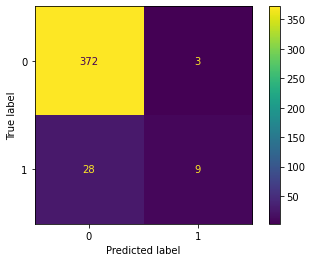

In [26]:
metrics.plot_confusion_matrix(logisticReg, x_test, y_test)

In [23]:
print(y_test)

[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0
 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0]


In [24]:
print(y_predicted)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0]


In [27]:
# The model has a high accuracy score, but it has very low true negative (yes response)
# Predictions were very pessimist, it predicted only 9 yes responses out of 37